In [ ]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.image as mpimg

import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__, np.__version__

In [ ]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

ROOT = "C:/Users/abbas/OneDrive/personal/feature_recognition_project/images_dataset/Extracted_Faces/Extracted_Faces/"
#C:\Users\abbas\OneDrive\personal\feature_recognition_project\images_dataset\Extracted_Faces\Extracted_Faces
def read_image(index):
    path = os.path.join(ROOT, index[0], index[1])
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


In [ ]:
def count_images_person(directory):
    folders = os.listdir(directory)
    
    random.shuffle(folders)
    
    _list =  {}
    
    # Creating img-list
    for folder in folders:
        num_files = len(os.listdir(os.path.join(directory, folder)))
        _list[folder] = num_files
        
    return _list    

In [5]:
def get_max(_imglst,min_s):
    for i in range(len(_imglst)):
        if list(_imglst.items())[i][1] > min_s:
            _dic_sel[list(_imglst.keys())[i]] = list(img_lst.values())[i]
    return _dic_sel

In [8]:
#HAARCASCADE
def harr_cascade(image):
    test=0
    import cv2
    # Converting image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  
    # Applying the face detection method on the grayscale image
    faces_rect = haar_cascade.detectMultiScale(gray_img, 1.05, 6)
    
    # Iterating through rectangles of detected faces
    for (x, y, w, h) in faces_rect:
    #cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
#         print(x, y, w, h)
        test=1
        image_croped=image[y:y+h, x:x+w]
        
    return image_croped if test!=0 else []   

In [9]:
#MTCNN

def mtcnn_detect(image):

    #print('mtcnnimg',l++1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    result=detector.detect_faces(image)
    bounding_box = result[0]['box']
    keypoints = result[0]['keypoints']

    image_c=image[bounding_box[0]:bounding_box[0]+bounding_box[2], bounding_box[1]:bounding_box[1] + bounding_box[3]]
    return image_c


In [10]:
#image_ augmentation


def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    image1 = normalization(image1)

    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    
    if brightness == 1.2:
        img = augment_brightness_camera_images(img)

    return img

In [39]:
# CALLING AUGMENTATION FUNCTIONS

def augment_image(image):

    img_grp=[] 

    for i in range(2):

        img_grp.append(transform_image(image,20,6,3,brightness=1))
    
    return img_grp

In [11]:
def binarize_img(image,min_t,max_t):

    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    ret, bw_img = cv2.threshold(img, min_t, max_t, cv2.THRESH_BINARY)
  
    # converting to its binary form
    bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  
    cv2.imshow("Binary", bw_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return bw

In [12]:
def normalization(gray_image):
    norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
    return norm_image

In [13]:
def image_write(folder,img,aug_rslt,ui):
    if ui == 2:
        for i in range(len(aug_rslt)):
            cv2.imwrite(TO_PATH + folder +'/'+ folder+'_'+img.split('.')[0]+'_'+str(i)+'.jpg', aug_rslt[i])   
    else: cv2.imwrite(TO_PATH + folder +'/'+ folder+'_'+img.split('.')[0]+'.jpg', aug_rslt)   

In [ ]:
i=0
folders = os.listdir(ROOT)

for folder in folders:
  if (len(os.listdir(os.path.join(ROOT, folder))) >= 19 ) :
    i+=1
    
print(i)

In [15]:
# PREPROCESSING IMAGES INCLUDES MAX AVA IMAGE PER PERSON, FACE DETECTION, AUGMENTATION, 

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import numpy as np
import matplotlib.image as mpimg
from mtcnn import MTCNN
import numpy as np

ROOT = 'C:/Users/abbas/Face Data/Face Dataset/'   
TO_PATH='C:/Users/abbas/Extracted_faces/'

folders = os.listdir(ROOT)

for folder in folders:
    _test= False
    if (len(os.listdir(os.path.join(ROOT, folder))) >= 19 ) & (len(os.listdir(os.path.join(ROOT, folder))) < 47 ):
        if len(os.listdir(os.path.join(ROOT, folder))) < 30: _test=True
    
        if not os.path.exists(TO_PATH+folder): os.mkdir(TO_PATH+folder)
        else: print('the folder '+folder+' exists')

        aug_rslt = []
        _i = 0
        _count = 40 - len(os.listdir(os.path.join(ROOT, folder)))
        for img in os.listdir(os.path.join(ROOT, folder)):
        #img_p = str(os.listdir(ROOT))+folder +'/'+img
           # aug_rslt = aug_img(img)
            
            image = cv2.imread(ROOT+folder+'/'+img)
            image_crop = harr_cascade(image)
            if np.any(image_crop)== False : image_crop = mtcnn_detect(image)
            #image_norm = normalization(image_crop)
                            
            if (_i < _count) & (_test==True) :
#                     print(_i)

#                     aug_rslt = augment_image(image_crop)
                    aug_rslt = image_crop

                    image_write(folder,img,aug_rslt,2)   
                    _i+=1

            else: image_write(folder,img,image_crop,1)           


In [ ]:
#individual images for selected dataset
import math
col=10
n_im=len(os.listdir(TO_PATH))
folders = os.listdir(ROOT)
fig, axarr=plt.subplots(nrows=math.ceil(n_im/col), ncols=col, figsize=(25, 10))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
axarr=axarr.flatten()
i=0
for folder in folders:  
    
    for img in os.listdir(os.path.join(ROOT, folder)):
        axarr[i].imshow(mpimg.imread(ROOT+folder+'/'+img))  
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
#         axarr[i].set_title(format(img.split('_')[0]))
#         break
        i+=1
    if i > 40 :break
    plt.suptitle("There are {} distinct people in the dataset".format(n_im))

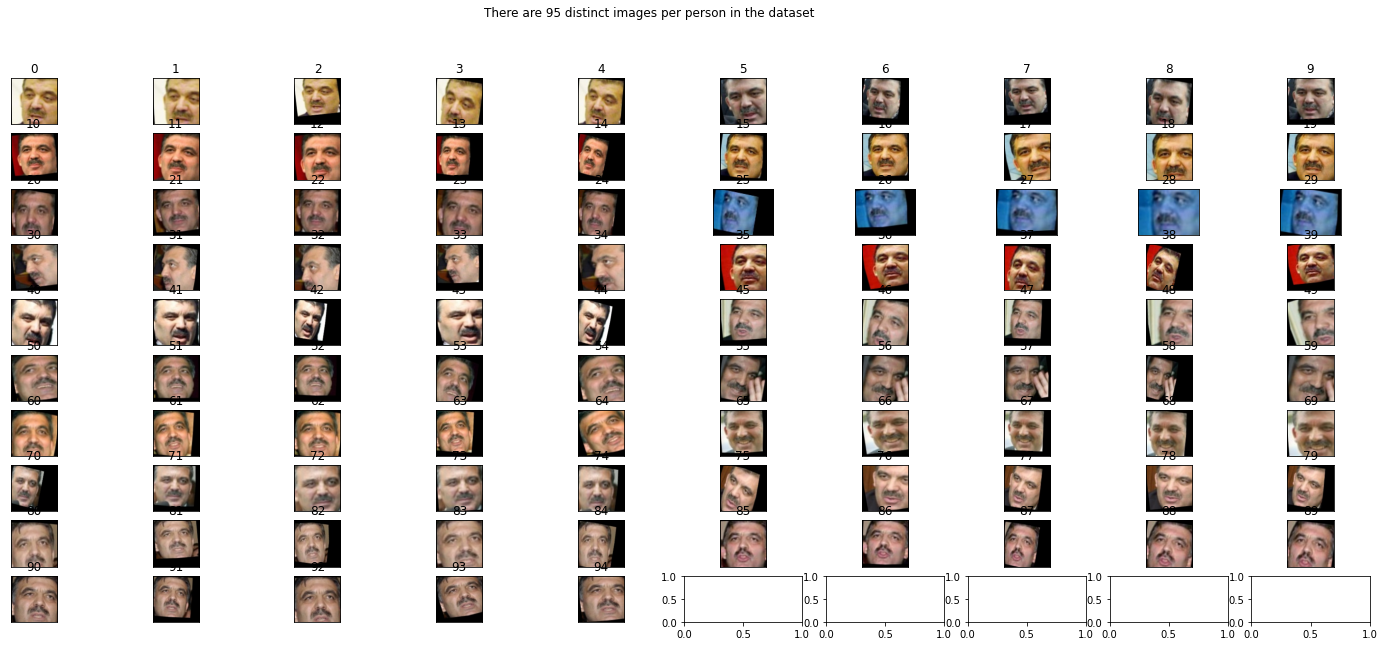

In [22]:
# available images per person(folder)
col=10
folders = os.listdir(TO_PATH)
folder='6'
n_im=len(os.listdir(os.path.join(TO_PATH, folder)))

fig, axarr=plt.subplots(nrows=math.ceil(n_im/col), ncols=col, figsize=(25, 10))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
axarr=axarr.flatten()
i=0
    
for img in os.listdir(os.path.join(TO_PATH, folder)):
    
        axarr[i].imshow(mpimg.imread(TO_PATH+folder+'/'+img))  
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        axarr[i].set_title(i)
        i+=1

        plt.suptitle("There are {} distinct images per person in the dataset".format(n_im))

In [19]:
ROOT_N='C:/Users/abbas/Extracted_faces/'

In [38]:
#feature extraction using HOG(Histogram of Oriented Gradients),LBP(local binary pattern),edge filte

from skimage.transform import resize
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v

# img = imread('C:/Users/abbas/Extracted_faces/6/6_0_0.jpg',as_gray=True)

def resize_img(img,n,m):
    
    resized_img = resize(img, (n,m)) 
    
    return resized_img

def Hog_feat_ext(resized_img):
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                     cells_per_block=(2, 2), visualize=True, multichannel=False)
    return [fd,hog_image]

# The number of points p in a circularly symmetric neighborhood to consider (thus removing relying on a square neighborhood).
# The radius of the circle r, which allows us to account for different scales.
def LBP_feat_x(resized_img): 
    radius=2
    npoint=8*radius

    lbp_image = local_binary_pattern(resized_img,npoint, radius, method='uniform')
    
    return lbp_image


def edge_filter(img):
    edges_prewitt_horizontal = prewitt_h(img)
#calculating vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(img)
    return edges_prewitt_vertical

def canny_filter(img):
    t_lower = 100 # Lower Threshold
    t_upper = 200 # Upper threshold
    aperture_size = 5 # Aperture size
    L2Gradient = True # Boolean
  
# Applying the Canny Edge filter 
# with Aperture Size and L2Gradient
    edge = cv2.Canny(img, t_lower, t_upper,
#                  apertureSize = aperture_size, 
#                  L2gradient = L2Gradient ) 
                    )
    return edge


In [25]:
def feature_fusion(feat1,feat2):
    
    from sklearn.preprocessing import MinMaxScaler
    
    if len(feat1) == len(feat2):
 
       if feat1.mean() >1:

           scaler = MinMaxScaler()
           normalized_data1 = scaler.fit_transform(LBP_feat_x(feat1))
       else:  normalized_data1=feat1
    
       if feat2.mean() >1:

            scaler = MinMaxScaler()
            normalized_data2 = scaler.fit_transform(LBP_feat_x(feat2))     
       else:  normalized_data2=feat2
    
       return(normalized_data1+normalized_data2)
    else: 
        print('lengh of vector are not same')
        return 0

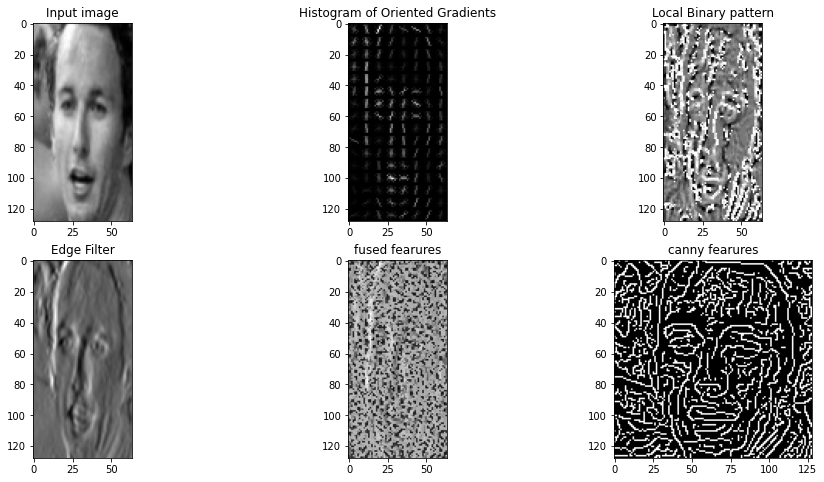

In [36]:
image = imread('C:/Users/abbas/Extracted Faces/Extracted Faces/0/2.jpg',as_gray=True)
im_can = imread('C:/Users/abbas/Extracted Faces/Extracted Faces/0/2.jpg')

resized_im = resize_img(image,128,64)
import cv2 
fig, ax = plt.subplots(2, 3, figsize=(16, 8)) 
    #For easy iteration flattened 4X10 subplots matrix to 40 array
ax=ax.flatten()
       
ax[0].imshow(resized_im, cmap=plt.cm.gray) 
ax[0].set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(Hog_feat_ext(resized_im)[1], in_range=(0, 10)) 

ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax[1].set_title('Histogram of Oriented Gradients')


ax[2].imshow(LBP_feat_x(resized_im), cmap=plt.cm.gray) 
ax[2].set_title('Local Binary pattern')

ax[3].imshow(edge_filter(resized_im), cmap=plt.cm.gray) 
ax[3].set_title('Edge Filter')

ax[4].imshow(feature_fusion(LBP_feat_x(resized_im),edge_filter(resized_im)), cmap=plt.cm.gray) 
ax[4].set_title('fused fearures')

ax[5].imshow(canny_filter(im_can), cmap=plt.cm.gray) 
ax[5].set_title('canny fearures')

plt.show()

In [30]:
import cv2 
  
img = cv2.imread('C:/Users/abbas/Extracted Faces/Extracted Faces/0/2.jpg') # Read image
  
# Defining all the parameters
t_lower = 100 # Lower Threshold
t_upper = 200 # Upper threshold
aperture_size = 5 # Aperture size
L2Gradient = True # Boolean
  
# Applying the Canny Edge filter 
# with Aperture Size and L2Gradient
edge = cv2.Canny(img, t_lower, t_upper,
                 apertureSize = aperture_size, 
                  ) 
  
cv2.imshow('original', img)
cv2.imshow('edge', edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [280]:
#  np.reshape(fd, (660*450))
Hog_feat_ext(resized_im)[1].shape   
np.reshape(Hog_feat_ext(resized_im)[1], (128*64))


array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
# divide extracted faces in train and test set
ROOT = 'C:/Users/abbas/Extracted_faces/'
TO_train='C:/Users/abbas/extr_faces/train_dataset/'
TO_validation='C:/Users/abbas/extr_faces/validation_dataset/'


folders = os.listdir(ROOT)

for folder in folders:
    
        _cn = len(os.listdir(os.path.join(ROOT, folder)))
        
        
        if os.path.exists(TO_train+folder): shutil.rmtree(TO_train+folder)
        else: os.mkdir(TO_train+folder)
        
        if os.path.exists(TO_validation+folder): shutil.rmtree(TO_validation+folder)
        else: os.mkdir(TO_validation+folder)

        for img in os.listdir(os.path.join(ROOT, folder)):
            image = cv2.imread(ROOT+folder+'/'+img)

            
            if _cn > (len(os.listdir(os.path.join(ROOT, folder)))*20)/100:

                cv2.imwrite(TO_train + folder +'/'+str(img), image)
                _cn-=1

            else: 

                    
                cv2.imwrite(TO_validation + folder +'/'+str(img), image)
                _cn-=1

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

In [115]:
# applying feature extraxtion methods in order to extract prominent features,then divide data in train dataset and 
# validation dataset 

import shutil

ROOT = 'C:/Users/abbas/Extracted_faces/'
TO_PATH_train='C:/Users/abbas/Extracted_features/train_dataset/'
TO_PATH_validation='C:/Users/abbas/Extracted_features/validation_dataset/'


folders = os.listdir(ROOT)

for folder in folders:
    
        _cn = len(os.listdir(os.path.join(ROOT, folder)))
        
        
        if os.path.exists(TO_PATH_train+folder): shutil.rmtree(TO_PATH_train+folder)
        else: os.mkdir(TO_PATH_train+folder)
        
        if os.path.exists(TO_PATH_validation+folder): shutil.rmtree(TO_PATH_validation+folder)
        else: os.mkdir(TO_PATH_validation+folder)

        for img in os.listdir(os.path.join(ROOT, folder)):
            image = imread(ROOT+folder+'/'+img, as_gray=True)
            resized_im = resize_img(image,128,64)
#             featured_img = LBP_feat_x(resized_im)
#             featured_img = Hog_feat_ext(resized_im)[1]
            featured_img = edge_filter(resized_im)

            if _cn > (len(os.listdir(os.path.join(ROOT, folder)))*20)/100:

                cv2.imwrite(TO_PATH_train + folder +'/'+str(img), featured_img)
                _cn-=1

            else: 

                    
                cv2.imwrite(TO_PATH_validation + folder +'/'+str(img), featured_img)
                _cn-=1
              
                
        #print(TO_PATH + folder +'/'+str(img))
#         plt.imshow(featured_img)   


In [4]:
from keras.applications import MobileNet
img_rows, img_cols = 224, 224 

MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

for layer in MobileNet.layers:
    layer.trainable = False
    

In [5]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 100

FC_Head = lw(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("Facial_recogNett.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Enter the number of training and validation samples here
nb_train_samples = 428
nb_validation_samples = 63

# We only train 5 EPOCHS 
epochs = 5
batch_size = 3

history = model.fit_generator(
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator)